In [1]:
import ott
import numpy as np
from entot.models.model import OTFlowMatching
from entot.nets.nets import MLP_vector_field, Bridge_MLP_mean
import sys
import os

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/equinox/_ad.py:753: UserWarning: As of Equinox 0.10.7, `equinox.filter_custom_vjp.defvjp` is deprecated in favour of `.def_fwd` and `.def_bwd`. This new API supports symbolic zeros, which allow for more efficient autodifferentiation rules. In particular:
- the fwd and bwd functions take an extra `perturbed` argument, which     indicates which primals actually need a gradient. You can use this     to skip computing the gradient for any unperturbed value. (You can     also safely just ignore this if you wish.)
- `None` was previously passed to indicate a symbolic zero gradient for     all objects that weren't inexact arrays, but all inexact arrays     always had an array-valued gradient. Now, `None` may also be passed     to indicate that an inexact array has a symbolic zero gradient.
  warnings.warn(
2023-08-10 09:49:07.714651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not 

In [2]:
source_data_train = np.load("/home/icb/dominik.klein/git_repos/genot_benchmarks/input_data/gaussian_data/gaussian_source_samples_1.0_2.npy")
target_data_train = np.load("/home/icb/dominik.klein/git_repos/genot_benchmarks/input_data/gaussian_data/gaussian_target_samples_1.0_2.npy")


In [6]:
neural_net = MLP_vector_field(source_data_train.shape[1], 128, 128, 128, n_frequencies=10)
bridge_net = Bridge_MLP_mean(target_data_train.shape[1], 128, 128)
ot_solver = ott.solvers.linear.sinkhorn.Sinkhorn()
solver_latent_to_data = ott.solvers.linear.sinkhorn.Sinkhorn()
seed=1
epsilon=1.0
otfm = OTFlowMatching(neural_net, bridge_net=bridge_net, ot_solver=ot_solver, epsilon=epsilon, input_dim=source_data_train.shape[1], output_dim=target_data_train.shape[1], iterations=2_000, k_noise_per_x=10, solver_latent_to_data=solver_latent_to_data, seed=seed)
otfm(source_data_train, target_data_train, 1024, 1024)



100%|██████████| 2000/2000 [04:15<00:00,  7.84it/s]


In [7]:
source_data_test =  source_data_train
res, _ , _= otfm.transport(source_data_test, seed=0)

<Axes: xlabel='x', ylabel='y'>

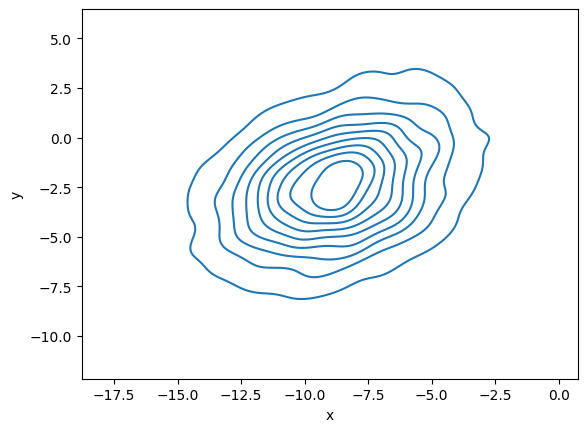

In [12]:
import pandas as pd
df = pd.DataFrame(res[0,...], columns=["x", "y"])
sns.kdeplot(df, x="x", y="y")